# checking if 200 m was an appropriate delineation for the CUC

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp
import cmocean.cm as cm
from matplotlib.patches import Rectangle
import matplotlib.colors as colors
from matplotlib.collections import PatchCollection
import datetime as dt
import netCDF4 as nc
from pathlib import Path

## general variables:

In [2]:
mymesh = xr.open_dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')

In [4]:
#in the format [section, igridW, igridE, fjgrid, maxdepth] for horizontal CS
# OR for vertical [section, jgridS, jgridN, figrid, maxdepth]
Sshelf = [5, 634, 644, 200, 180] #h
Sslope = [4, 579, 633, 200, 500] #h

In [5]:
igrid = 200-1
lonW = 579
lonE = 644

In [15]:
def draw_patches(fmask, lonW, lonE, t_dist, t_depths): #draw ground part of cross section
    topo = []
    for i in range(lonW,lonE):
        for j in range(len(t_depths)-1):
            if fmask[j, i] == 0:
                rect = Rectangle((t_dist[i], t_depths[j]), t_dist[i+1]-t_dist[i], t_depths[j+1]-t_depths[j])
                topo.append(rect)
    pc = PatchCollection(topo, facecolors='gray', zorder=3)
    return(pc)

## Next, CS strait from the model

In [7]:
igrid=200-1
fmask = mymesh.fmask[0, :, igrid, :]
t_lons = mymesh.glamt[0, igrid]
m2lon = ((t_lons[lonE]-t_lons[lonW])/(mymesh.e1t[0, igrid, lonW:lonE].sum()))
t_dist = t_lons/m2lon
t_depths = mymesh.gdept_1d[0,:]

In [10]:
# what if we averaged all the u velocities for the whole winter of 2016/17

In [11]:
startday = [dt.datetime(2016,10,2)+dt.timedelta(days=i) for i in range(int(25*7))]
folders = [dt.datetime(2016,10,2)+dt.timedelta(days=7*(i+1)) for i in range(int(25))]
folders = np.repeat(folders,7)

In [12]:
path = Path("/ocean/mdunphy/CIOPSW-BC12/")
    
    # load U
drop_vars = (
        "depthu_bounds", "nav_lat", "nav_lon", 'time_counter_bounds', 'time_instant',
        'time_instant_bounds', 
    )

filesU = [sorted(path.glob("{:%Y%m%d}00/BC12_1d_grid_U_{:%Y%m%d}_{:%Y%m%d}.nc".format(folders[i], startday[i], startday[i]))) for i in range(len(startday))]

 # load V
drop_vars = (
        "depthv_bounds", "nav_lat", "nav_lon", 'time_counter_bounds', 'time_instant',
        'time_instant_bounds', 
    )

filesV = [sorted(path.glob("{:%Y%m%d}00/BC12_1d_grid_V_{:%Y%m%d}_{:%Y%m%d}.nc".format(folders[i], startday[i], startday[i]))) for i in range(len(startday))]

In [13]:
u_mean = xr.open_mfdataset(filesU, drop_variables=drop_vars)['uo'].mean(dim='time_counter')[:,igrid, lonW:lonE]
v_mean = xr.open_mfdataset(filesV, drop_variables=drop_vars)['vo'].mean(dim='time_counter')[:,igrid, lonW:lonE]
velocity = np.sqrt(u_mean.values**2,v_mean.values**2)

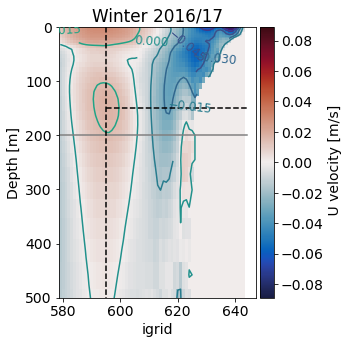

In [12]:
# nc_file = "/ocean/rbeutel/data/201701/U_new_20170101.nc"
plt.rcParams['font.size'] = 14
mesh_nc = nc.Dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')
fig, ax= plt.subplots(nrows=1, ncols=1, figsize =(5,5))
igrid = 200-1
lonW = 579
lonE = 644
k = 0

data = u_mean.values
        # X, Y = np.meshgrid(nc_to_plot['nav_lat'][646,255:273], nc_to_plot['depthu'])
section_slice = np.arange(lonW,lonE)
zlevels = mesh_nc['gdept_1d'][:][0]
X, Y = np.meshgrid(section_slice, zlevels)
tmesh = ax.pcolormesh(X,Y,data, cmap = cm.balance, \
                              vmin = -1 * np.max(np.abs(data)), vmax = np.max(np.abs(data)))
CS = ax.contour(X,Y,data,vmin = -1 * np.max(np.abs(data)), vmax = np.max(np.abs(data)))
ax.clabel(CS, CS.levels, inline=True, fontsize=12)
ax.set_ylim([0,500])
ax.invert_yaxis()
ax.set_ylabel('Depth [m]')
ax.set_xlabel('igrid')
ax.set_title('Winter 2016/17')

cbar = fig.colorbar(tmesh, ax=ax, orientation = 'vertical',fraction=0.08, pad=0.02)#, ticks = tticks)
cbar.set_label(label=' U velocity [m/s]') 

ax.plot([lonW,lonE],[200,200],c='grey')
ax.plot([595,595], [0,500],'k--')
ax.plot([595,644], [150,150],'k--')
    
plt.tight_layout()
# plt.savefig("./figures/201617_CIOPS_U.png")

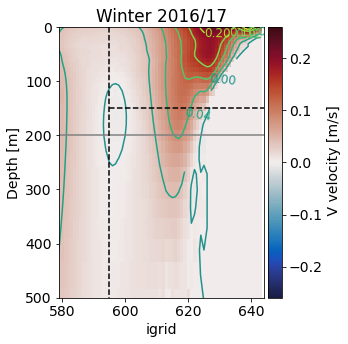

In [14]:
# nc_file = "/ocean/rbeutel/data/201701/U_new_20170101.nc"
plt.rcParams['font.size'] = 14
mesh_nc = nc.Dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')
fig, ax= plt.subplots(nrows=1, ncols=1, figsize =(5,5))
igrid = 200-1
lonW = 579
lonE = 644
k = 0

data = v_mean.values
        # X, Y = np.meshgrid(nc_to_plot['nav_lat'][646,255:273], nc_to_plot['depthu'])
section_slice = np.arange(lonW,lonE)
zlevels = mesh_nc['gdept_1d'][:][0]
X, Y = np.meshgrid(section_slice, zlevels)
tmesh = ax.pcolormesh(X,Y,data, cmap = cm.balance, \
                              vmin = -1 * np.max(np.abs(data)), vmax = np.max(np.abs(data)))
CS = ax.contour(X,Y,data,vmin = -1 * np.max(np.abs(data)), vmax = np.max(np.abs(data)))
ax.clabel(CS, CS.levels, inline=True, fontsize=12)
ax.set_ylim([0,500])
ax.set_xlim([579,644])
ax.invert_yaxis()
ax.set_ylabel('Depth [m]')
ax.set_xlabel('igrid')
ax.set_title('Winter 2016/17')

ax.plot([lonW,lonE],[200,200],c='grey')
ax.plot([595,595], [0,500],'k--')
ax.plot([595,644], [150,150],'k--')

cbar = fig.colorbar(tmesh, ax=ax, orientation = 'vertical',fraction=0.08, pad=0.02)#, ticks = tticks)
cbar.set_label(label=' V velocity [m/s]') 
    
plt.tight_layout()
# plt.savefig("./figures/201617_CIOPS_U.png")

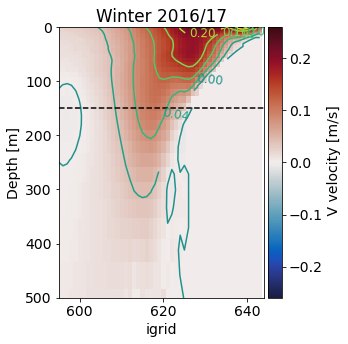

In [17]:
# nc_file = "/ocean/rbeutel/data/201701/U_new_20170101.nc"
plt.rcParams['font.size'] = 14
mesh_nc = nc.Dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')
fig, ax= plt.subplots(nrows=1, ncols=1, figsize =(5,5))
igrid = 200-1
lonW = 579
lonE = 644

data = v_mean.values
section_slice = np.arange(lonW,lonE)
zlevels = mesh_nc['gdept_1d'][:][0]
X, Y = np.meshgrid(section_slice, zlevels)

cmap = cm.balance
# data = np.where(data>0, data, data*np.nan)
# cmap.set_bad('lightgrey')

tmesh = ax.pcolormesh(X,Y,data, cmap = cmap, \
                              vmin = -1 * np.max(np.abs(data)), vmax = np.max(np.abs(data)))
CS = ax.contour(X,Y,data,vmin = -1 * np.max(np.abs(data)), vmax = np.max(np.abs(data)))
ax.clabel(CS, CS.levels, inline=True, fontsize=12)
ax.set_ylim([0,500])
# ax.set_xlim([579,644])
ax.set_xlim([595,644])
ax.invert_yaxis()
ax.set_ylabel('Depth [m]')
ax.set_xlabel('igrid')
ax.set_title('Winter 2016/17')

# ax.plot([lonW,lonE],[200,200],c='grey')
# ax.plot([595,595], [0,500],'k--')
ax.plot([595,644], [150,150],'k--')

#getting land to show is proving non-trivial...
# pc = draw_patches(fmask, 595, lonE, np.array(t_dist), np.array(t_depths))
# ax.add_collection(pc)

cbar = fig.colorbar(tmesh, ax=ax, orientation = 'vertical',fraction=0.08, pad=0.02)#, ticks = tticks)
cbar.set_label(label=' V velocity [m/s]') 
    
plt.tight_layout()
plt.savefig("./figures/201617_CIOPS_V.png")

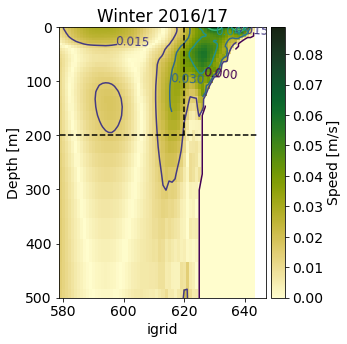

In [27]:
plt.rcParams['font.size'] = 14
mesh_nc = nc.Dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')
fig, ax= plt.subplots(nrows=1, ncols=1, figsize =(5,5))
igrid = 200-1
lonW = 579
lonE = 644
k = 0

data = velocity
        # X, Y = np.meshgrid(nc_to_plot['nav_lat'][646,255:273], nc_to_plot['depthu'])
section_slice = np.arange(lonW,lonE)
zlevels = mesh_nc['gdept_1d'][:][0]
X, Y = np.meshgrid(section_slice, zlevels)
tmesh = ax.pcolormesh(X,Y,data, cmap = cm.speed, \
                              vmin = 0, vmax = np.max(np.abs(data)))
CS = ax.contour(X,Y,data,vmin = 0, vmax = np.max(np.abs(data)))
ax.clabel(CS, CS.levels, inline=True, fontsize=12)
ax.set_ylim([0,500])
ax.invert_yaxis()
ax.set_ylabel('Depth [m]')
ax.set_xlabel('igrid')
ax.set_title('Winter 2016/17')

ax.plot([lonW,lonE],[200,200],c='grey')
ax.plot([595,595], [0,500],'k--')
ax.plot([595,644], [150,150],'k--')

cbar = fig.colorbar(tmesh, ax=ax, orientation = 'vertical',fraction=0.08, pad=0.02)#, ticks = tticks)
cbar.set_label(label='Speed [m/s]') 
    
plt.tight_layout()

In [13]:
startday = [dt.datetime(2017,10,1)+dt.timedelta(days=i) for i in range(int(25*7))]
folders = [dt.datetime(2017,10,1)+dt.timedelta(days=7*(i+1)) for i in range(int(25))]
folders = np.repeat(folders,7)

In [14]:
path = Path("/ocean/mdunphy/CIOPSW-BC12/")
    
    # load U
drop_vars = (
        "depthu_bounds", "nav_lat", "nav_lon", 'time_counter_bounds', 'time_instant',
        'time_instant_bounds', 
    )

filesU = [sorted(path.glob("{:%Y%m%d}00/BC12_1d_grid_U_{:%Y%m%d}_{:%Y%m%d}.nc".format(folders[i], startday[i], startday[i]))) for i in range(len(startday))]

 # load V
drop_vars = (
        "depthv_bounds", "nav_lat", "nav_lon", 'time_counter_bounds', 'time_instant',
        'time_instant_bounds', 
    )

filesV = [sorted(path.glob("{:%Y%m%d}00/BC12_1d_grid_V_{:%Y%m%d}_{:%Y%m%d}.nc".format(folders[i], startday[i], startday[i]))) for i in range(len(startday))]

In [15]:
u_mean = xr.open_mfdataset(filesU, drop_variables=drop_vars)['uo'].mean(dim='time_counter')[:,igrid, lonW:lonE]
v_mean = xr.open_mfdataset(filesV, drop_variables=drop_vars)['vo'].mean(dim='time_counter')[:,igrid, lonW:lonE]
speed = np.sqrt(u_mean.values**2,v_mean.values**2)

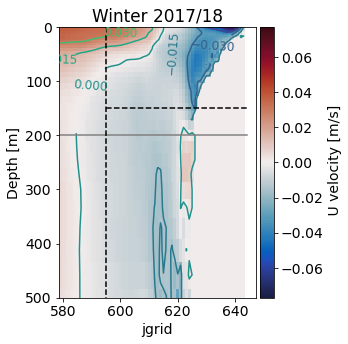

In [16]:
# nc_file = "/ocean/rbeutel/data/201701/U_new_20170101.nc"
plt.rcParams['font.size'] = 14

mesh_nc = nc.Dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')
fig, ax= plt.subplots(nrows=1, ncols=1, figsize =(5,5))
igrid = 200-1
lonW = 579 
lonE = 644
k = 0

data = u_mean.values
        # X, Y = np.meshgrid(nc_to_plot['nav_lat'][646,255:273], nc_to_plot['depthu'])
section_slice = np.arange(lonW,lonE)
zlevels = mesh_nc['gdept_1d'][:][0]
X, Y = np.meshgrid(section_slice, zlevels)
tmesh = ax.pcolormesh(X,Y,data, cmap = cm.balance, \
                              vmin = -1 * np.max(np.abs(data)), vmax = np.max(np.abs(data)))
CS = ax.contour(X,Y,data,vmin = -1 * np.max(np.abs(data)), vmax = np.max(np.abs(data)))
ax.clabel(CS, CS.levels, inline=True, fontsize=12)
ax.set_ylim([0,500])
ax.invert_yaxis()
ax.set_ylabel('Depth [m]')
ax.set_xlabel('jgrid')
ax.set_title('Winter 2017/18')

ax.plot([lonW,lonE],[200,200],c='grey')
ax.plot([595,595], [0,500],'k--')
ax.plot([595,644], [150,150],'k--')

cbar = fig.colorbar(tmesh, ax=ax, orientation = 'vertical',fraction=0.08, pad=0.02)#, ticks = tticks)
cbar.set_label(label=' U velocity [m/s]') 
    
plt.tight_layout()
# plt.savefig("./figures/201718_CIOPS_U.png")

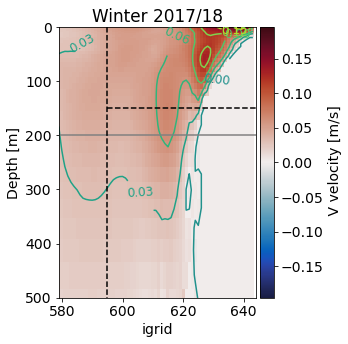

In [17]:
# nc_file = "/ocean/rbeutel/data/201701/U_new_20170101.nc"
plt.rcParams['font.size'] = 14
mesh_nc = nc.Dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')
fig, ax= plt.subplots(nrows=1, ncols=1, figsize =(5,5))
igrid = 200-1
lonW = 579
lonE = 644
k = 0

data = v_mean.values
        # X, Y = np.meshgrid(nc_to_plot['nav_lat'][646,255:273], nc_to_plot['depthu'])
section_slice = np.arange(lonW,lonE)
zlevels = mesh_nc['gdept_1d'][:][0]
X, Y = np.meshgrid(section_slice, zlevels)
tmesh = ax.pcolormesh(X,Y,data, cmap = cm.balance, \
                              vmin = -1 * np.max(np.abs(data)), vmax = np.max(np.abs(data)))
CS = ax.contour(X,Y,data,vmin = -1 * np.max(np.abs(data)), vmax = np.max(np.abs(data)))
ax.clabel(CS, CS.levels, inline=True, fontsize=12)
ax.set_ylim([0,500])
ax.set_xlim([lonW,lonE])
ax.invert_yaxis()
ax.set_ylabel('Depth [m]')
ax.set_xlabel('igrid')
ax.set_title('Winter 2017/18')

ax.plot([lonW,lonE],[200,200],c='grey')
ax.plot([595,595], [0,500],'k--')
ax.plot([595,644], [150,150],'k--')

cbar = fig.colorbar(tmesh, ax=ax, orientation = 'vertical',fraction=0.08, pad=0.02)#, ticks = tticks)
cbar.set_label(label=' V velocity [m/s]') 
    
plt.tight_layout()
# plt.savefig("./figures/201617_CIOPS_U.png")

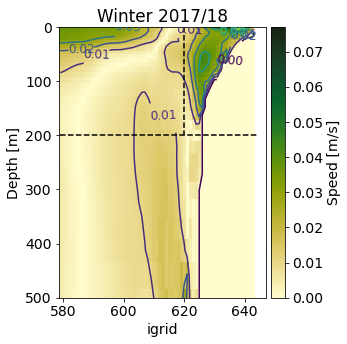

In [31]:
plt.rcParams['font.size'] = 14
mesh_nc = nc.Dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')
fig, ax= plt.subplots(nrows=1, ncols=1, figsize =(5,5))
igrid = 200-1
lonW = 579
lonE = 644
k = 0

data = speed
        # X, Y = np.meshgrid(nc_to_plot['nav_lat'][646,255:273], nc_to_plot['depthu'])
section_slice = np.arange(lonW,lonE)
zlevels = mesh_nc['gdept_1d'][:][0]
X, Y = np.meshgrid(section_slice, zlevels)
tmesh = ax.pcolormesh(X,Y,data, cmap = cm.speed, \
                              vmin = 0, vmax = np.max(np.abs(data)))
CS = ax.contour(X,Y,data,vmin = 0, vmax = np.max(np.abs(data)))
ax.clabel(CS, CS.levels, inline=True, fontsize=12)
ax.set_ylim([0,500])
ax.invert_yaxis()
ax.set_ylabel('Depth [m]')
ax.set_xlabel('igrid')
ax.set_title('Winter 2017/18')

ax.plot([lonW,lonE],[200,200],'k--')
ax.plot([620,620], [0,200],'k--')

cbar = fig.colorbar(tmesh, ax=ax, orientation = 'vertical',fraction=0.08, pad=0.02)#, ticks = tticks)
cbar.set_label(label='Speed [m/s]') 
    
plt.tight_layout()

In [18]:
startday = [dt.datetime(2017,6,4)+dt.timedelta(days=i) for i in range(int(17*7))]
folders = [dt.datetime(2017,6,4)+dt.timedelta(days=7*(i+1)) for i in range(int(17))]
folders = np.repeat(folders,7)

path = Path("/ocean/mdunphy/CIOPSW-BC12/")
    # load U
drop_vars = (
        "depthu_bounds", "nav_lat", "nav_lon", 'time_counter_bounds', 'time_instant',
        'time_instant_bounds', 
    )

filesU = [sorted(path.glob("{:%Y%m%d}00/BC12_1d_grid_U_{:%Y%m%d}_{:%Y%m%d}.nc".format(folders[i], startday[i], startday[i]))) for i in range(len(startday))]
   
    # load V
drop_vars = (
        "depthv_bounds", "nav_lat", "nav_lon", 'time_counter_bounds', 'time_instant',
        'time_instant_bounds', 
    )

filesV = [sorted(path.glob("{:%Y%m%d}00/BC12_1d_grid_V_{:%Y%m%d}_{:%Y%m%d}.nc".format(folders[i], startday[i], startday[i]))) for i in range(len(startday))]

In [19]:
u_mean = xr.open_mfdataset(filesU, drop_variables=drop_vars)['uo'].mean(dim='time_counter')[:,igrid, lonW:lonE]
v_mean = xr.open_mfdataset(filesV, drop_variables=drop_vars)['vo'].mean(dim='time_counter')[:,igrid, lonW:lonE]
speed = np.sqrt(u_mean.values**2,v_mean.values**2)

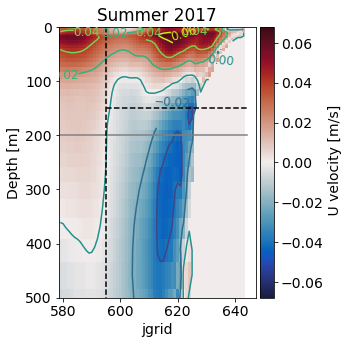

In [20]:
plt.rcParams['font.size'] = 14

mesh_nc = nc.Dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')
fig, ax= plt.subplots(nrows=1, ncols=1, figsize =(5,5))
igrid = 200-1
lonW = 579
lonE = 644
k = 0

data = u_mean.values
        # X, Y = np.meshgrid(nc_to_plot['nav_lat'][646,255:273], nc_to_plot['depthu'])
section_slice = np.arange(lonW,lonE)
zlevels = mesh_nc['gdept_1d'][:][0]
X, Y = np.meshgrid(section_slice, zlevels)
tmesh = ax.pcolormesh(X,Y,data, cmap = cm.balance, \
                              vmin = -1 * np.max(np.abs(data)), vmax = np.max(np.abs(data)))
CS = ax.contour(X,Y,data,vmin = -1 * np.max(np.abs(data)), vmax = np.max(np.abs(data)))
ax.clabel(CS, CS.levels, inline=True, fontsize=12)
ax.set_ylim([0,500])
ax.invert_yaxis()
ax.set_ylabel('Depth [m]')
ax.set_xlabel('jgrid')
ax.set_title('Summer 2017')

ax.plot([lonW,lonE],[200,200],c='grey')
ax.plot([595,595], [0,500],'k--')
ax.plot([595,644], [150,150],'k--')

cbar = fig.colorbar(tmesh, ax=ax, orientation = 'vertical',fraction=0.08, pad=0.02)#, ticks = tticks)
cbar.set_label(label=' U velocity [m/s]') 
    
plt.tight_layout()

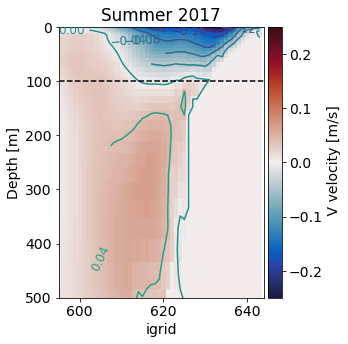

In [21]:
# nc_file = "/ocean/rbeutel/data/201701/U_new_20170101.nc"
plt.rcParams['font.size'] = 14
mesh_nc = nc.Dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')
fig, ax= plt.subplots(nrows=1, ncols=1, figsize =(5,5))
igrid = 200-1
lonW = 579
lonE = 644
k = 0

data = v_mean.values
        # X, Y = np.meshgrid(nc_to_plot['nav_lat'][646,255:273], nc_to_plot['depthu'])
section_slice = np.arange(lonW,lonE)
zlevels = mesh_nc['gdept_1d'][:][0]
X, Y = np.meshgrid(section_slice, zlevels)
tmesh = ax.pcolormesh(X,Y,data, cmap = cm.balance, \
                              vmin = -1 * np.max(np.abs(data)), vmax = np.max(np.abs(data)))
CS = ax.contour(X,Y,data,vmin = -1 * np.max(np.abs(data)), vmax = np.max(np.abs(data)))
ax.clabel(CS, CS.levels, inline=True, fontsize=12)
ax.set_ylim([0,500])
# ax.set_xlim([lonW,lonE])
ax.set_xlim([595,lonE])
ax.invert_yaxis()
ax.set_ylabel('Depth [m]')
ax.set_xlabel('igrid')
ax.set_title('Summer 2017')

# ax.plot([lonW,lonE],[200,200],c='grey')
# ax.plot([595,595], [0,500],'k--')
ax.plot([595,644], [100,100],'k--')

cbar = fig.colorbar(tmesh, ax=ax, orientation = 'vertical',fraction=0.08, pad=0.02)#, ticks = tticks)
cbar.set_label(label=' V velocity [m/s]') 
    
plt.tight_layout()
plt.savefig("./figures/summer_CIOPS_V.png")

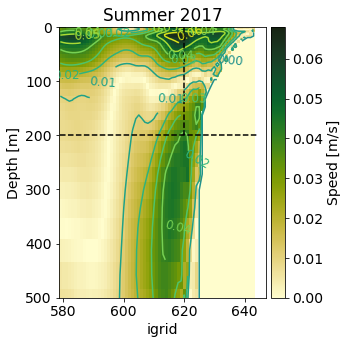

In [22]:
plt.rcParams['font.size'] = 14
mesh_nc = nc.Dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')
fig, ax= plt.subplots(nrows=1, ncols=1, figsize =(5,5))
igrid = 200-1
lonW = 579
lonE = 644
k = 0

data = speed
        # X, Y = np.meshgrid(nc_to_plot['nav_lat'][646,255:273], nc_to_plot['depthu'])
section_slice = np.arange(lonW,lonE)
zlevels = mesh_nc['gdept_1d'][:][0]
X, Y = np.meshgrid(section_slice, zlevels)
tmesh = ax.pcolormesh(X,Y,data, cmap = cm.speed, \
                              vmin = 0, vmax = np.max(np.abs(data)))
CS = ax.contour(X,Y,data,vmin = 0, vmax = np.max(np.abs(data)))
ax.clabel(CS, CS.levels, inline=True, fontsize=12)
ax.set_ylim([0,500])
ax.invert_yaxis()
ax.set_ylabel('Depth [m]')
ax.set_xlabel('igrid')
ax.set_title('Summer 2017')

ax.plot([lonW,lonE],[200,200],'k--')
ax.plot([620,620], [0,200],'k--')

cbar = fig.colorbar(tmesh, ax=ax, orientation = 'vertical',fraction=0.08, pad=0.02)#, ticks = tticks)
cbar.set_label(label='Speed [m/s]') 
    
plt.tight_layout()